This script is based on exc_inh.mouse_adult_brains.Saunders_2018.ipynb. 
It is modified to analyze more detailed subclusters of brain cell types. I.e., not only seperating neurons into excitatory and inhibitory neurons, but all >500 clusters of neuron and non-neuronal clusters. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from matplotlib_venn import venn3

# import heapq
import scipy.stats as stats

# import statsmodels.api as sm
# import matplotlib.ticker as mtick

# from statannot import add_stat_annotation

import pingouin as pg

# import plotly.express as px

matplotlib.rcParams['figure.dpi']= 300

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
annotation_df = pd.read_excel('../results/single-cell/saunders_2018/enhanced_annotation.xlsx',index_col='tissue_subcluster')
annotation_df.sort_index(axis=0,inplace=True)

In [23]:
# expression level in aggregated UMIs of each gene in each metacell
metacell_df = pd.read_csv('../data/single-cell/saunders_2018/metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv', index_col=[0])

metacell_df.sort_index(axis=0,inplace=True)
metacell_df.sort_index(axis=1,inplace=True)

In [24]:
# Normalizing expression level by dividing UMI to total UMI of a subcluster
norm_express_df = metacell_df/metacell_df.sum()

In [25]:
avg_dNdS_df=pd.read_csv('../results/Ensembl98_mouse/mouse.dNdS_stats.all_genes.tsv',sep='\t',usecols=['Gene name','mean'],index_col='Gene name')

avg_dNdS_df.rename(columns={'mean':'avg_dNdS'},inplace=True)

In [26]:
subcluster_expressed_dNdS_df = pd.DataFrame(columns=norm_express_df.columns)
for column in norm_express_df:
    index = norm_express_df[norm_express_df[column]>0.0001].index
    dNdS_list = avg_dNdS_df[avg_dNdS_df.index.isin(index)]['avg_dNdS']
    median_dNdS = dNdS_list.median()
    mean_dNdS = dNdS_list.mean()
    
    cluster_class=annotation_df.loc[column,'class']
    master_class=annotation_df.loc[column,'master_class']
    tissue=annotation_df.loc[column,'tissue']
    common_name=annotation_df.loc[column,'common_name']
    
    subcluster_expressed_dNdS_df.loc['median_dNdS',column]=median_dNdS
    subcluster_expressed_dNdS_df.loc['mean_dNdS',column]=mean_dNdS
    subcluster_expressed_dNdS_df.loc['class',column]=cluster_class
    subcluster_expressed_dNdS_df.loc['tissue',column]=tissue
    subcluster_expressed_dNdS_df.loc['master_class',column]=master_class
    subcluster_expressed_dNdS_df.loc['common_name',column]=common_name

In [27]:
subcluster_expressed_dNdS_df.T['median_dNdS']=pd.to_numeric(subcluster_expressed_dNdS_df.T['median_dNdS'])

In [28]:
N_data = subcluster_expressed_dNdS_df.T[subcluster_expressed_dNdS_df.T['master_class']=='Neuron']
G_data = subcluster_expressed_dNdS_df.T[subcluster_expressed_dNdS_df.T['master_class']=='Glia']
V_data = subcluster_expressed_dNdS_df.T[subcluster_expressed_dNdS_df.T['master_class']=='Vasculature']

### Each cluster represented by median dN/dS

<AxesSubplot:xlabel='master_class', ylabel='median_dNdS'>

<AxesSubplot:xlabel='master_class', ylabel='median_dNdS'>

<AxesSubplot:xlabel='master_class', ylabel='median_dNdS'>

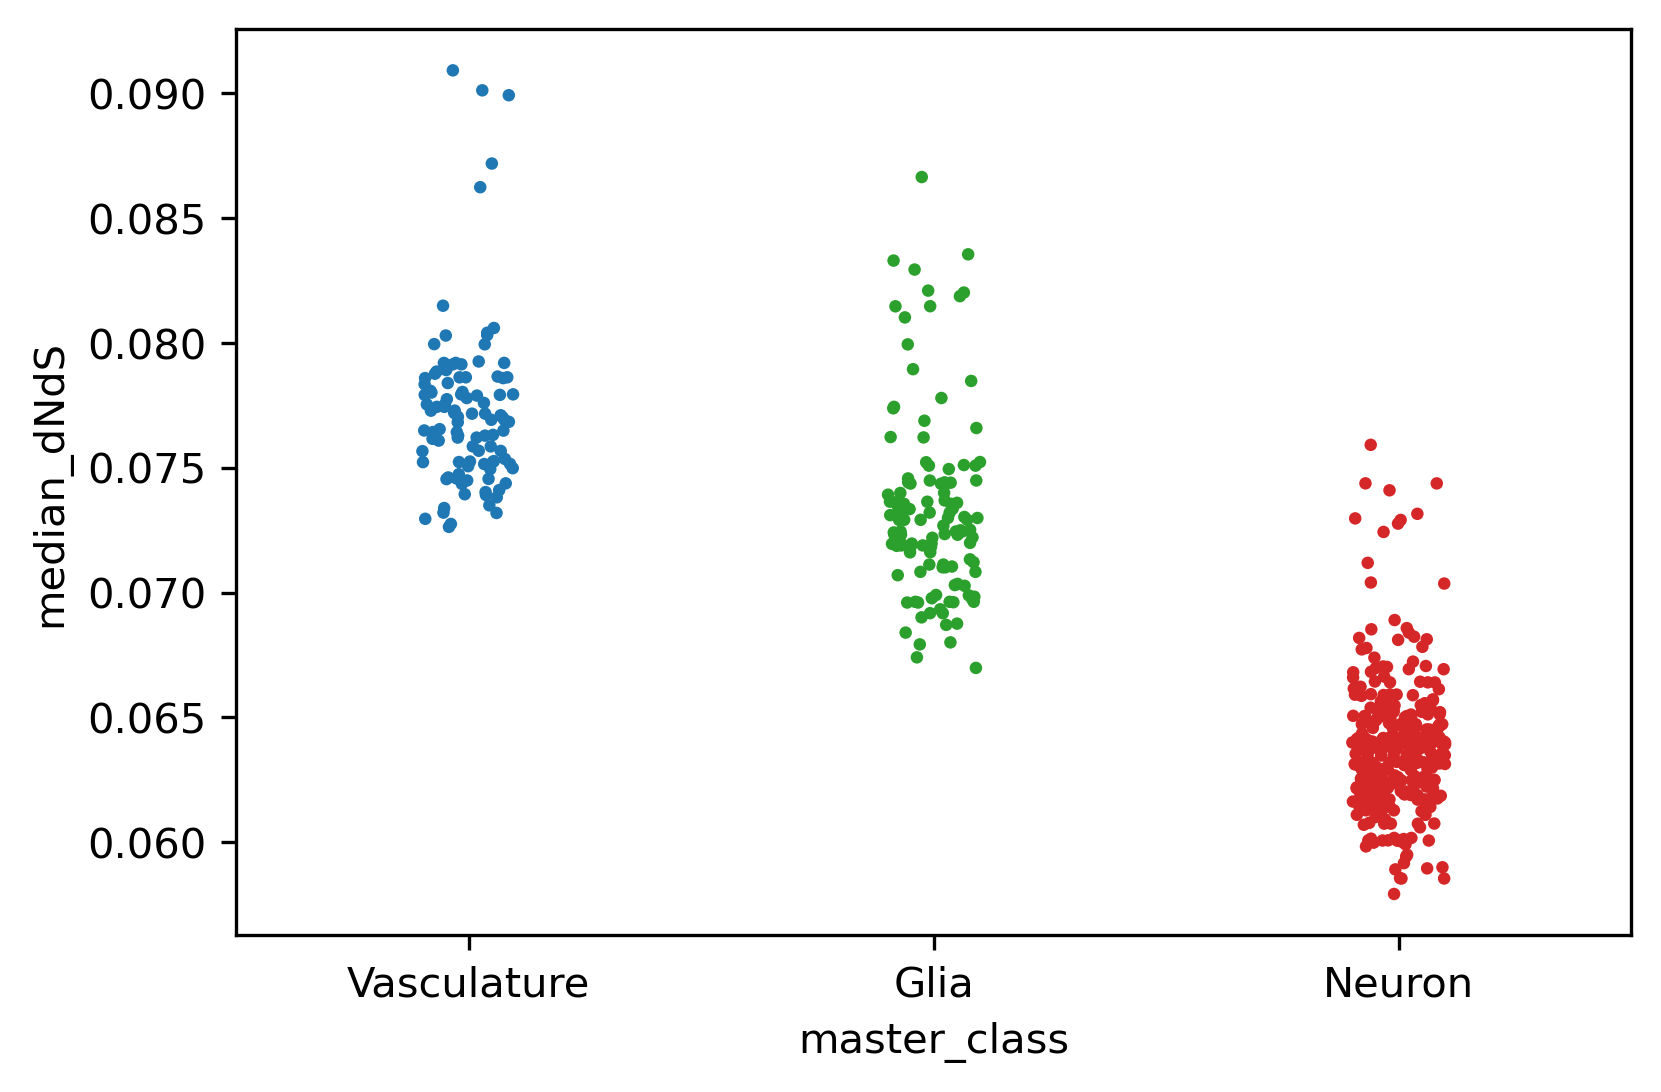

In [29]:
sns.stripplot(x='master_class',y='median_dNdS',data=N_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:red'],size=3)
sns.stripplot(x='master_class',y='median_dNdS',data=G_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:green'],size=3)
sns.stripplot(x='master_class',y='median_dNdS',data=V_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:blue'],size=3)

# ax.set(ylim=(0.103,0.104))
plt.show()

In [30]:
pg.mwu(G_data['median_dNdS'].tolist(),N_data['median_dNdS'].tolist(),alternative='two-sided')

pg.mwu(V_data['median_dNdS'].tolist(),N_data['median_dNdS'].tolist(),alternative='two-sided')

pg.mwu(V_data['median_dNdS'].tolist(),G_data['median_dNdS'].tolist(),alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,40505.0,two-sided,5.572565e-56,-0.960172,0.980086


,U-val,alternative,p-val,RBC,CLES
MWU,35196.5,two-sided,1.616288e-53,-0.995266,0.997633


,U-val,alternative,p-val,RBC,CLES
MWU,10891.5,two-sided,4.239473e-19,-0.686643,0.843322


In [31]:
stats.kruskal(G_data['median_dNdS'].tolist(),N_data['median_dNdS'].tolist(),V_data['median_dNdS'].tolist())

KruskalResult(statistic=402.859175850594, pvalue=3.313152848321114e-88)

In [32]:
print('Median dN/dS Across Clusters Medians:')
print('Neuronal Clusters:')
print(N_data['median_dNdS'].median())
print('Glial Clusters:')
print(G_data['median_dNdS'].median())
print('Vasculature Clusters:')
print(V_data['median_dNdS'].median())

Median dN/dS Across Clusters Medians:
Neuronal Clusters:
0.0637591895478162
Glial Clusters:
0.0726781202352219
Vasculature Clusters:
0.0770096257585999


### Each cluster represented by average dN/dS

<AxesSubplot:xlabel='master_class', ylabel='mean_dNdS'>

<AxesSubplot:xlabel='master_class', ylabel='mean_dNdS'>

<AxesSubplot:xlabel='master_class', ylabel='mean_dNdS'>

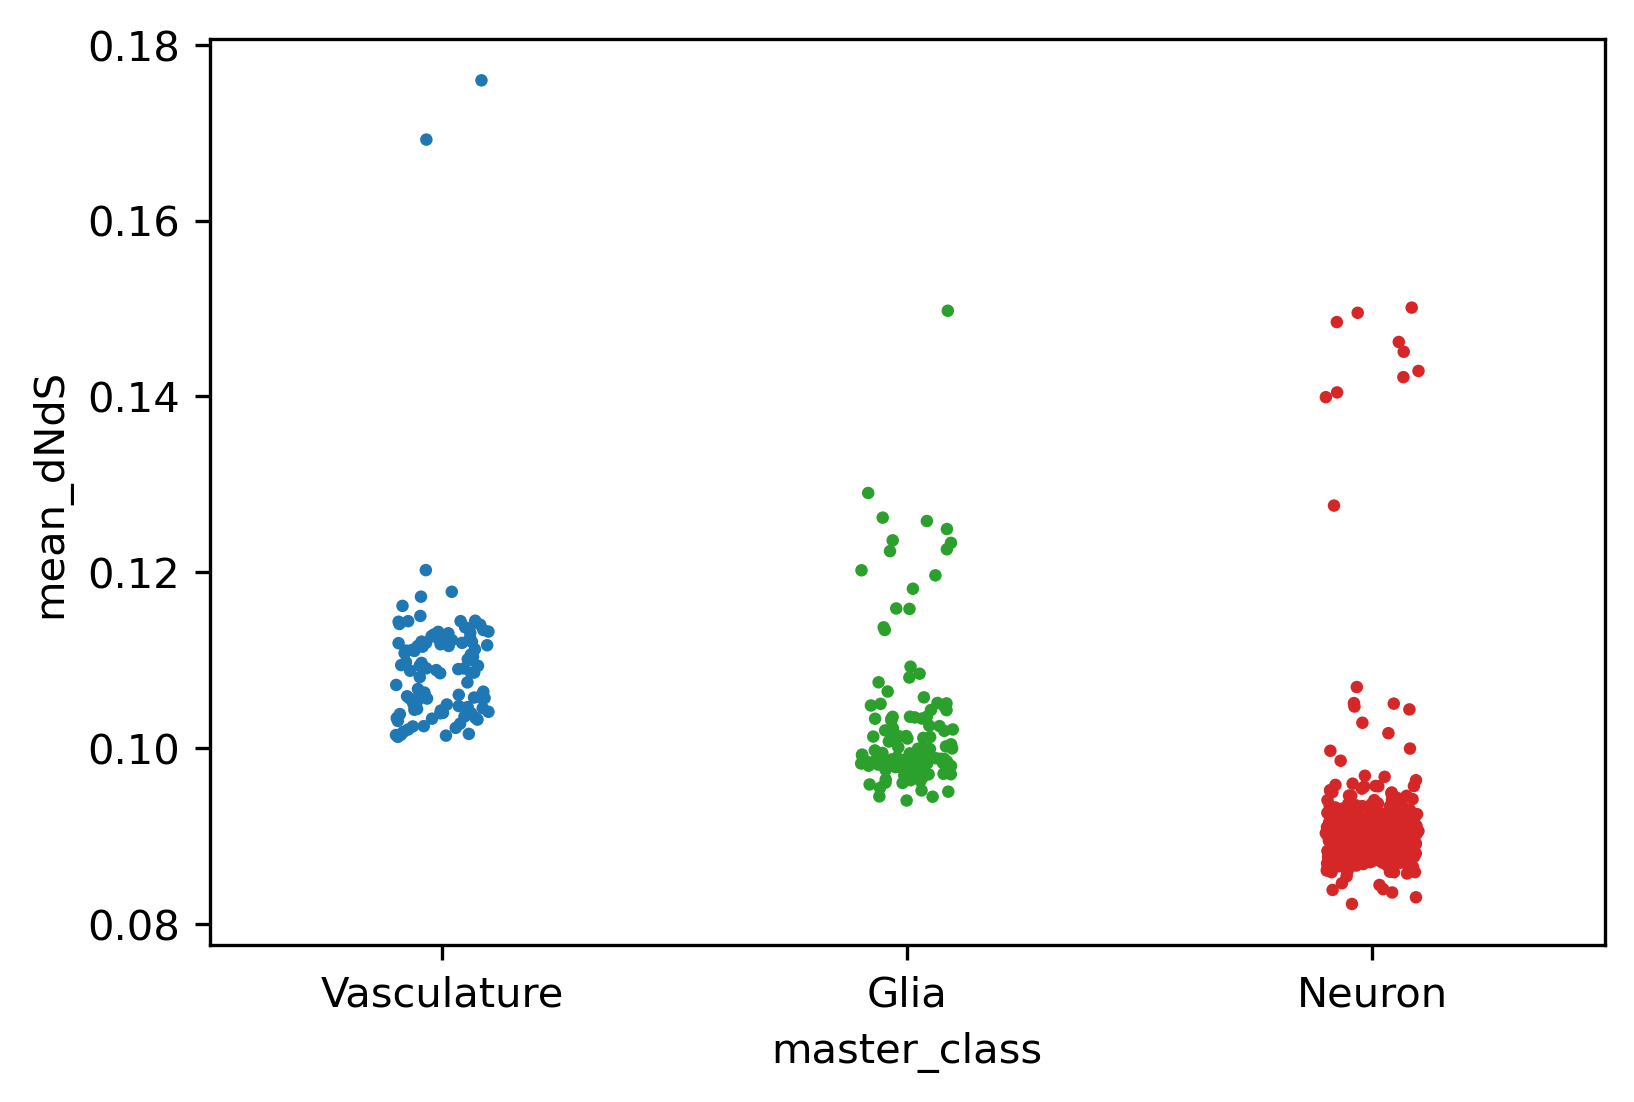

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=N_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:red'],size=3)
sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=G_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:green'],size=3)
sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=V_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:blue'],size=3)

# sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=subcluster_expressed_dNdS_df.T, order=['Vasculature', 'Glia','Neuron'], hue='tissue',size=3)

# ax.set_yscale('log')
# ax.set(ylim=(0.103,0.104))
# plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

In [34]:
pg.mwu(G_data['mean_dNdS'].tolist(),N_data['mean_dNdS'].tolist(),alternative='two-sided')

pg.mwu(V_data['mean_dNdS'].tolist(),N_data['mean_dNdS'].tolist(),alternative='two-sided')

pg.mwu(V_data['mean_dNdS'].tolist(),G_data['mean_dNdS'].tolist(),alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,39169.0,two-sided,6.288319e-49,-0.895519,0.947759


,U-val,alternative,p-val,RBC,CLES
MWU,34080.0,two-sided,3.802258e-47,-0.931973,0.965986


,U-val,alternative,p-val,RBC,CLES
MWU,10676.0,two-sided,1.956502e-17,-0.653271,0.826636


In [35]:
stats.kruskal(G_data['mean_dNdS'].tolist(),N_data['mean_dNdS'].tolist(),V_data['mean_dNdS'].tolist())

KruskalResult(statistic=352.4111268533893, pvalue=2.98466864459456e-77)

In [36]:
print('Median dN/dS Across Clusters Average:')
print('Neuronal Clusters:')
print(N_data['mean_dNdS'].median())
print('Glial Clusters:')
print(G_data['mean_dNdS'].median())
print('Vasculature Clusters:')
print(V_data['mean_dNdS'].median())

Median dN/dS Across Clusters Average:
Neuronal Clusters:
0.09025516598199267
Glial Clusters:
0.09967625438115983
Vasculature Clusters:
0.10904370314706828


### Identify the outliers

In [40]:
V_data[V_data['mean_dNdS']>0.16]

,median_dNdS,mean_dNdS,class,tissue,master_class,common_name
SN_8-1,0.0901,0.169208,EPENDYMAL,P60SubstantiaNigra,Vasculature,Ependyma.Ccdc153
TH_10-1,0.090899,0.175945,EPENDYMAL,P60Thalamus,Vasculature,Ependymal.Ccdc153


In [41]:
G_data[G_data['mean_dNdS']>0.14]

,median_dNdS,mean_dNdS,class,tissue,master_class,common_name
SN_6-1,0.068757,0.149735,POLYDENDROCYTE,P60SubstantiaNigra,Glia,Polydendrocyte.Tnr.Cspg5


In [53]:
N_data[N_data['mean_dNdS']>0.14]

,median_dNdS,mean_dNdS,class,tissue,master_class,common_name
CB_3-1,0.0641,0.140445,NEURON,P60Cerebellum_ALT,Neuron,Cerebellum basket cells 1
CB_4-1,0.068233,0.145071,NEURON,P60Cerebellum_ALT,Neuron,Unipolar brush cell
SN_3-14,0.064647,0.142179,NEURON,P60SubstantiaNigra,Neuron,"red nucleus, magnocellular/parvicellular (RMC/..."
SN_3-16,0.062169,0.142886,NEURON,P60SubstantiaNigra,Neuron,"GABAergic, K/Na Channel State"
TH_2-11,0.064089,0.146183,NEURON,P60Thalamus,Neuron,Non-anterior nuclei
TH_3-10,0.064031,0.148444,NEURON,P60Thalamus,Neuron,Anterior pretectal nucleus (APT)
TH_3-11,0.065067,0.1495,NEURON,P60Thalamus,Neuron,Neuron.Gad1Gad2.Ttn
TH_3-8,0.064089,0.15009,NEURON,P60Thalamus,Neuron,Neuron.Gad1Gad2.Col25a1


In [45]:
N_data.tissue.value_counts()

P60Hippocampus                    77
P60Cortex_noRep5_POSTERIORonly    63
P60Cortex_noRep5_FRONTALonly      51
P60GlobusPallidus                 37
P60Striatum                       31
P60SubstantiaNigra                30
P60Thalamus                       26
P60EntoPeduncular                 12
P60Cerebellum_ALT                  9
Name: tissue, dtype: int64

<AxesSubplot:xlabel='master_class', ylabel='mean_dNdS'>

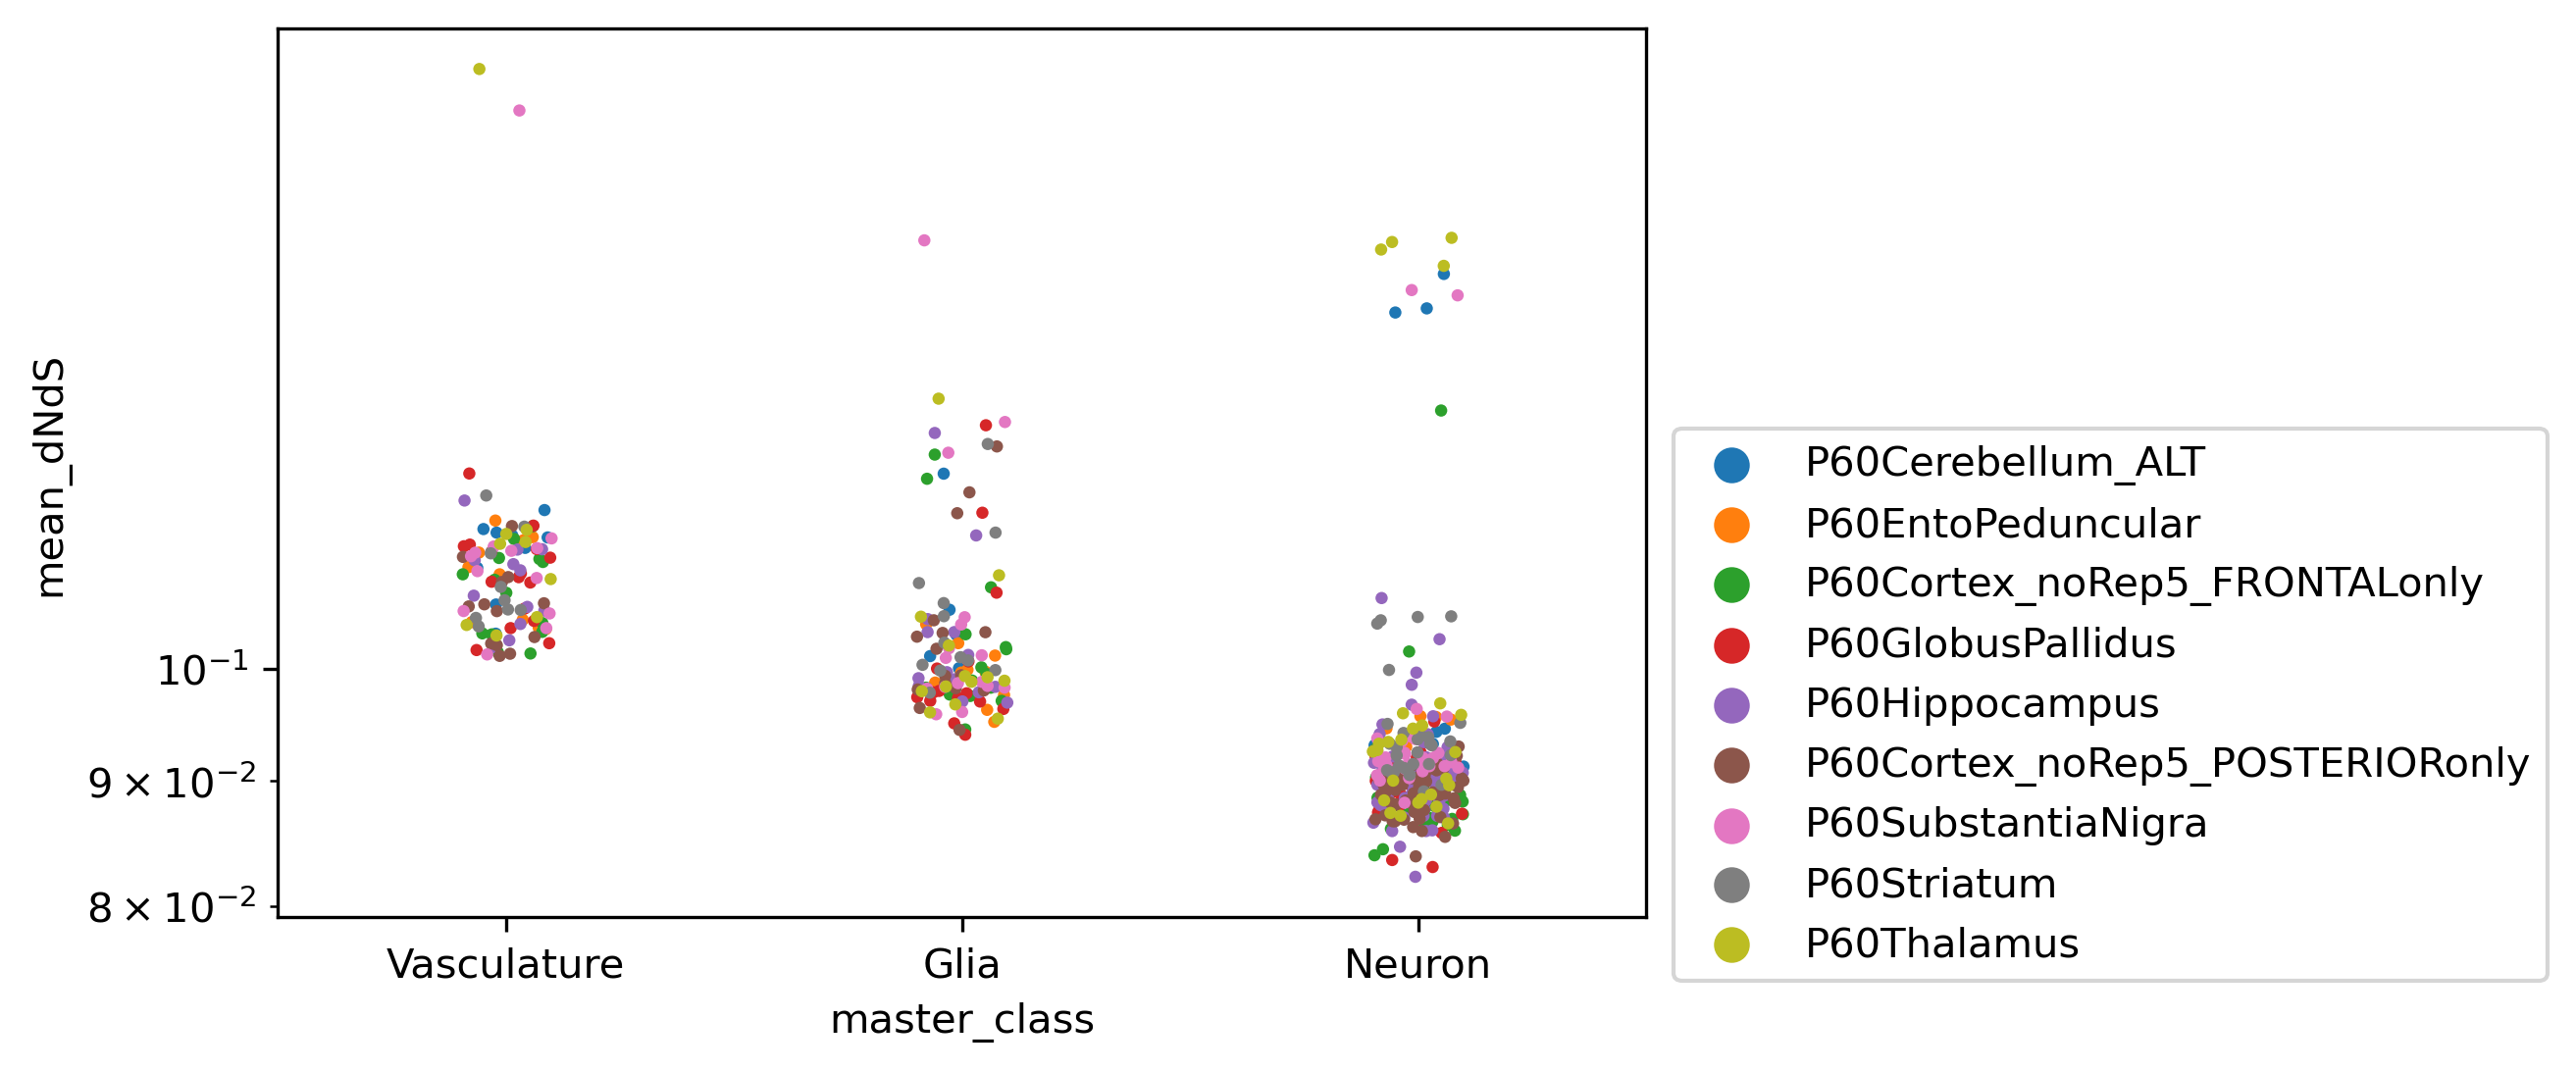

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

# sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=N_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:red'],size=3)
# sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=G_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:green'],size=3)
# sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=V_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:blue'],size=3)

sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=subcluster_expressed_dNdS_df.T, order=['Vasculature', 'Glia','Neuron'], hue='tissue',size=3)

ax.set_yscale('log')
# ax.set(ylim=(0.103,0.104))
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

In [58]:
palette={
    'Neuron':'tab:red',
    'Vasculature':'tab:blue',
    'Glia':'tab:green',
    'Mitotic':'tab:orange'
}

<AxesSubplot:xlabel='tissue', ylabel='mean_dNdS'>

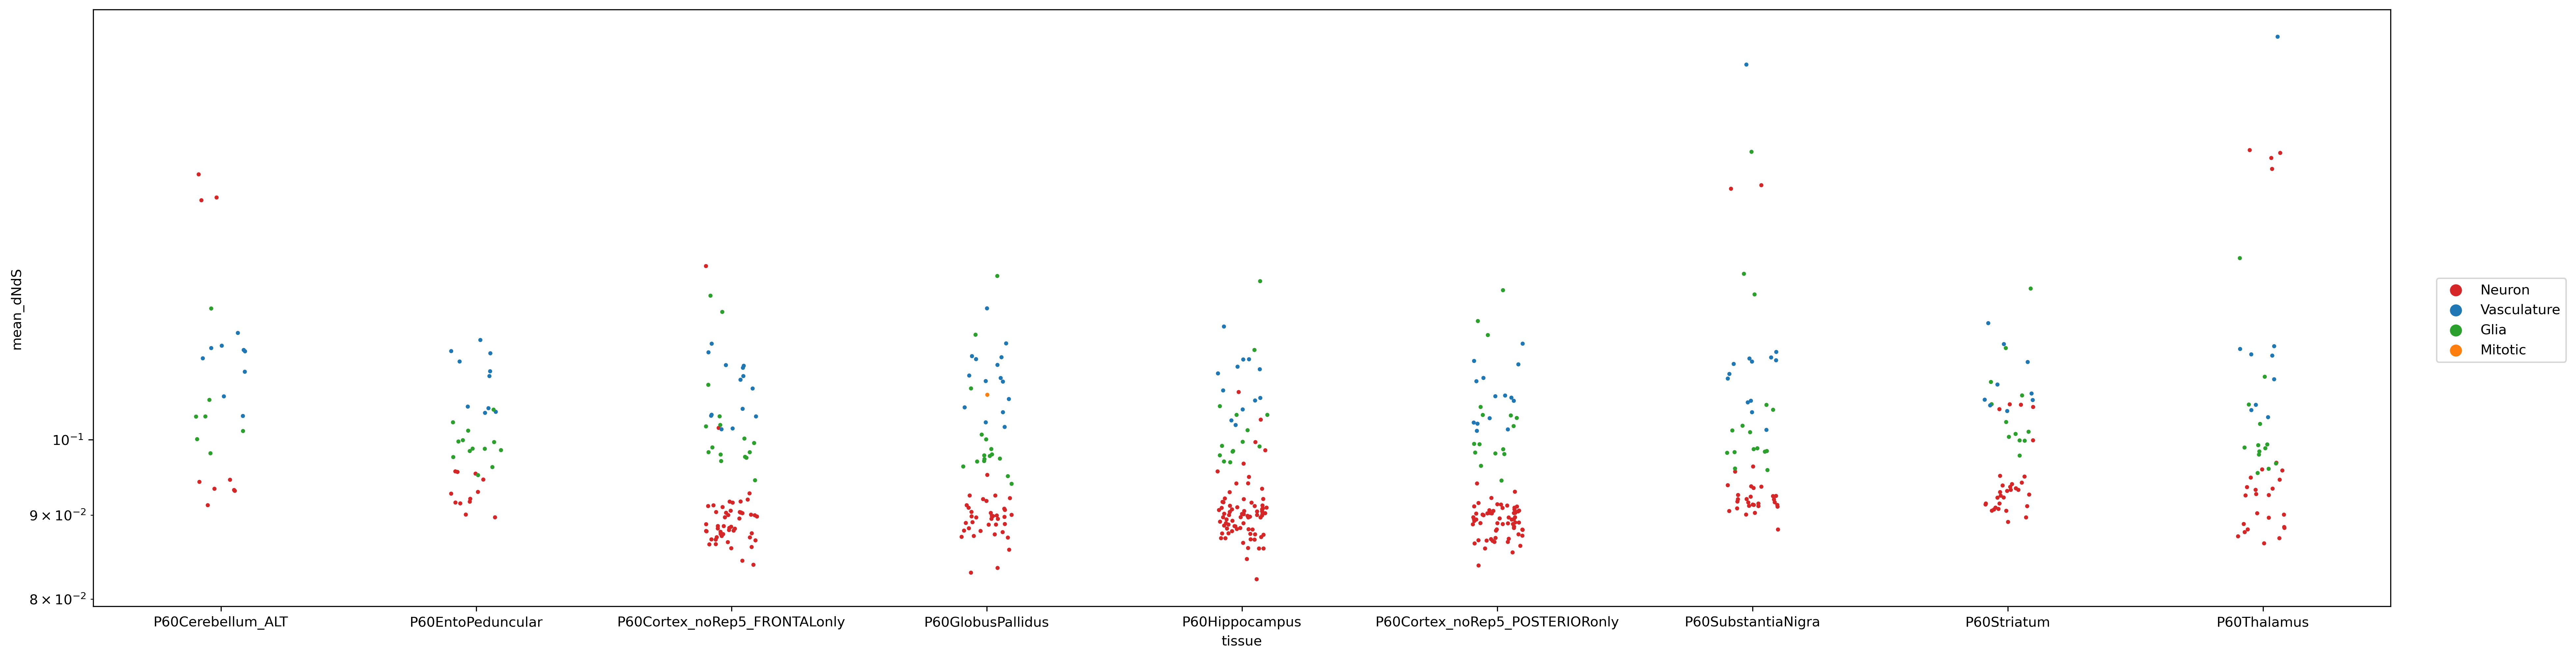

In [59]:
fig = plt.figure(figsize=(30,8))
ax = fig.add_subplot(111)

# sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=N_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:red'],size=3)
# sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=G_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:green'],size=3)
# sns.stripplot(ax=ax,x='master_class',y='mean_dNdS',data=V_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:blue'],size=3)

sns.stripplot(ax=ax,x='tissue',y='mean_dNdS',data=subcluster_expressed_dNdS_df.T, hue='master_class',palette=palette,size=3)

ax.set_yscale('log')
# ax.set(ylim=(0.103,0.104))
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()